In [2]:
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [7]:
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
random_state1 = 5
random_state2 = 5

The code above sets the seed for the random states for reproducibility.

In [ ]:
class Perceptron_Model(nn.Module):
  def __init__(self, input_nodes=8, output_nodes=1):
    super().__init__()
    self.out = nn.Linear(input_nodes, output_nodes)

  def forward(self, x):
    x = F.sigmoid(self.out(x))
    return x

The perceptron model inherits from the neural network module in PyTorch which serves as a base for neural network modules.
In this case, we have 8 input nodes which are our features and 1 output node which will be the final output
The F.sigmoid function applies sigmoid activation function to the output which maps the range to between 0 and 1 which makes it useful for binary classification tasks

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df = pd.read_csv(url, header=None)

Declaring the source of the url and reading the csv file into the dataframe

In [ ]:
df.shape

(768, 9)

using df.shape we are able to tell that there are 768 record rows and each record has 9 columns 

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


df.head() shows us the first 5 records in the dataframe

In [ ]:
X = df.drop(8, axis=1)
y = df[8]

X= df.drop(8, axis=1) df[8] represents the column with the index 8 which is also our output column and axis=1 specifies that we are targeting a column as the default would be axis=0 which would be a row instead. this will result in X being a new dataframe that contains all the input features without the output value
y= df[8] would then be a dataframe containing only the output value.

In [ ]:
def normalize_df(df):
    for column in df.columns:
        df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

X = normalize_df(X)

Here, we create a function to normalize our feature values. noralize_df(df) defines a function that takes a dataframe as an input in which for each column in the dataframe, the values in the columns would be normalized by the value minus the mean over the standard deviation which is also known as Z-score calculation and then the values would be returned to the dataframe.

In [ ]:
X = X.values
y = y.values

assigning the dataframe and series x and y respectively into numpy arrays to be in line with the machine learning algorithm that we will be using which expects for the input features and the target variables(output) to be in numpy arrays

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state1)

After importing the train_test_split from scikit-learn's model selection module, which is used to split arrays or matrices into random train and test subsets, we specify for the test data set size to be 20% of the data and the remaining 80% to be assigned for the training data set and then we assign the randomstate to equate to the variable random_state1 which we earlier declared as 5.

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

Here we convert the train and test datasets into PyTorch tensors which make them compatible with PyTorch's models and functions for input data

In [ ]:
perceptron_model = Perceptron_Model()

An instance of 'perceptron_model' which follows the Perceptron_Model we declared above using the default parameter of input_nodes=8 and output_nodes=1

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(perceptron_model.parameters(), lr=0.001)

Variable criterion = nn.MSELoss() creates an instance of the Mean Squared Error(MSE) loss function

Variable optimizer = torch.optim.Adam creates an instance of an Adaptive Moment Estimation (Adam) optimizer which is used to update the weights of the neural network and in this case, we pass the perceptron model parameters to the optimizer to be updated during training and set the learning rate (lr) to be 0.001 which controls how much the model's weight are adjusted during each iteration of training. a smaller learning rate means smaller adjustments and vice versa.

-- Additional Information --

Adam Optiimzer works by computing adaptive learning rates for each parameter from estiamtes of first and second moments of the gradients and helps in faster convergence. It also combines features from other optimizers like AdaGrad and RMSProp to adaptively adjust the learning rates of the parameters


In [ ]:
torch.manual_seed(random_state2)

In [ ]:
epochs = 10000
losses = []

for i in range(epochs):
  y_pred = perceptron_model.forward(X_train).view(-1)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 1000 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 0.2622711956501007
Epoch: 1000 Loss: 0.1639469712972641
Epoch: 2000 Loss: 0.15549099445343018
Epoch: 3000 Loss: 0.1544806808233261
Epoch: 4000 Loss: 0.1543986201286316
Epoch: 5000 Loss: 0.15439653396606445
Epoch: 6000 Loss: 0.15439653396606445
Epoch: 7000 Loss: 0.15439653396606445
Epoch: 8000 Loss: 0.15439653396606445
Epoch: 9000 Loss: 0.15439653396606445


An Epoch specifies the number of iterations over the entire dataset during training.

Here, we declare that looping through the number of epochs to perform the training,

y_pred = perceptron_model.forward(X_train).view(-1) which performs a forward pass through the model to compute the prediction and reshapes the output tensor to a 1 dimensional tensor to ensure it matches the shape of y_train in the next step to compute the loss

loss = criterion(y_pred, y_train) computes the loss between the predicted values of y_pred and the actual y_train values

losses.append(loss.detach().numpy()) detaches the loss tensor fromm the comutation graph to prevent further gradient calculations and converts it back to a numpy array and then appends the loss value to the "losses" list.

if i % 1000 == 0 statement prints the loss value every 1000 epochs.

optimizer.zero_grad() zeros out the gradients of the model parameters as PyTorch accumulates gradients by default hence there is a need to reset them at the start of each training step.

loss.backward() computes the gradient of the loss with respect to the odmel parameters using backpropagation

optimizer.step() updates the model parameters using the computed gradients

This loop basically continues for 1000 epochs and gradually refines the model's paraeters to reduce loss.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline is a command used in jupyter notebook files to display plots directly within the notebook. When the plot is created, it will automatically render the plot in the notebook instead of opening a separate window as shown below.

Text(0.5, 0, 'Epochs')

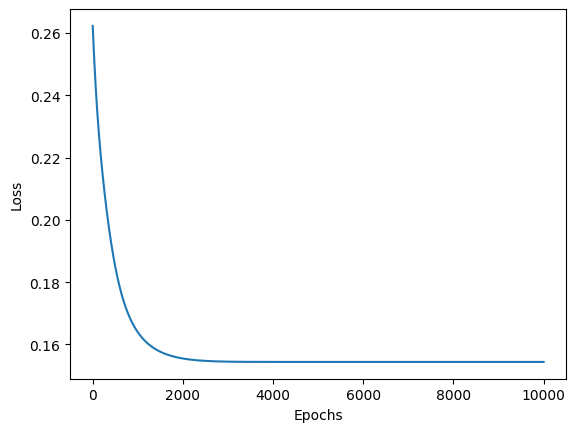

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel('Epochs')

The output of this code plots a line plot where the x axis shows the epochs and the y axis shows the loss values showing the model's performance and typically and as seen above, the loss value can be expected to decrease as the number of epochs increases.

In [ ]:
correct_count = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_pred = perceptron_model.forward(data)

    # print(f'Row: {i} \tActual: {y_test[i]} \tPredict: {torch.round(y_pred).item()}')
    if torch.round(y_pred).item() == y_test[i]:
      correct_count +=1

print(f'{correct_count} correct predictions')
print(f'{round(correct_count / len(y_test) * 100, 2)}% accuracy')

124 correct predictions
80.52% accuracy


torch.no_grad() is a context manager that disables gradient calculation as during the evaluation phase, there is no need to copute gradients wh en making predictions.

the loop loops over each data point in the X_test set where data is the feature and the y_pred value will be that of the perceptron_model.forward(data) outcome that generates a prediction

if torch.round(y_pred).item() == y_test[i] checks if the rounded prediction matches the actual label

the accuracy is then printed according to the number of correct predictions and the overall accuracy.

In [ ]:
perceptron_model.state_dict()

OrderedDict([('out.weight',
              tensor([[ 4.4033e-01,  1.1400e+00, -3.3008e-01, -1.5277e-01, -1.8577e-04,
                        7.7737e-01,  5.0522e-01,  1.4182e-01]])),
             ('out.bias', tensor([-0.8469]))])

state_dict() method is used to retrieve the state of the model in the form of a Python dictionary object containing all the learnable parameters of the model and any persistent buffers that the model contains